In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## import dataset

In [3]:
# Generate synthetic data
data = pd.read_csv('https://raw.githubusercontent.com/josephgitau/sept/main/Employee.csv')

data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
# Reshape data for scikit-learn
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [6]:
# encode the categorical variables

cat_columns = data.select_dtypes(include=['object']).columns

# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder
encoder = OrdinalEncoder()

# fit-transform the data
X[cat_columns] = encoder.fit_transform(X[cat_columns])

# check data
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.0,2017,0.0,3,34,1.0,0.0,0
1,0.0,2013,2.0,1,28,0.0,0.0,3
2,0.0,2014,1.0,3,38,0.0,0.0,2
3,1.0,2016,0.0,3,27,1.0,0.0,5
4,1.0,2017,2.0,3,24,1.0,1.0,2


In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# instantiate the model
model = LogisticRegression(max_iter=1000)

# fit the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.715359828141783
Confusion Matrix:
[[552  58]
 [207 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       610
           1       0.66      0.36      0.46       321

    accuracy                           0.72       931
   macro avg       0.70      0.63      0.63       931
weighted avg       0.71      0.72      0.69       931



In [20]:
# Generate synthetic data
np.random.seed(0)
hours_studied = np.random.rand(100) * 10  # 100 students, hours studied between 0 and 10
pass_exam = (hours_studied + np.random.randn(100) * 2 > 5).astype(int)  # Threshold to pass is 5 hours with some noise

# Reshape data for scikit-learn
X = hours_studied.reshape(-1, 1)
y = pass_exam

In [21]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

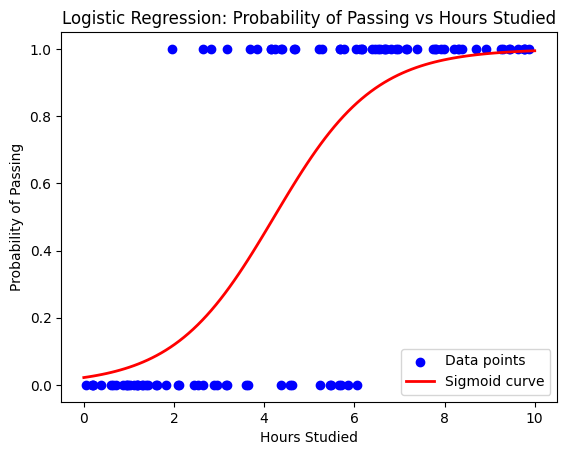

In [22]:
# Plotting the sigmoid curve
plt.scatter(X, y, color='blue', label='Data points')
X_curve = np.linspace(0, 10, 100).reshape(-1, 1)
y_curve = model.predict_proba(X_curve)[:, 1]
plt.plot(X_curve, y_curve, color='red', linewidth=2, label='Sigmoid curve')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability of Passing vs Hours Studied')
plt.legend()
plt.show()